# Projektarbeit Gruppe 2: Gesundheitsdaten

https://www.kaggle.com/datasets/sooyoungher/smoking-drinking-dataset

In [41]:
# Import der benötigten Bibliotheken

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [42]:
# Neuer Datensatz
path = str(os.getcwd()).replace("\Projektarbeit\Aufgaben", "")

# Lesen der CSV Datei:
data = pd.read_csv(path + '\dataset_custom.csv')



In [43]:
# Auswahl von 7 Komponenten: Hybridform aus Feature Selection und Korrelationsanalyse mit gewissem Bias (welche Features machen Sinn/Intuition)
data = data[['Geschlecht', 'Alter', 'Gewicht',
       'HDL_Cholesterin', 'Triglycerid',
       'gamma_GTP', 'Hämoglobin',]]

# Anforderungen 7: Dimensionalitätsreduktion

Definieren Sie für Ihren Datensatz ein oder mehrere Ziele, die Sie mit Hilfe von Dimensionsreduktion der Daten
erreichen wollen.

In [44]:
# 1) Verbesserung der Modellleistung: 
# In verschiedenen methodischen Ansätzen, wie etwa der Feature Selection oder einer Hybridform aus Feature Selection und Korrelationsanalyse, 
# zeigt sich eine hohe zeitliche Beanspruchung bei der Modellberechnung (>50 Minuten). Die Dimensionalitätsreduktion erweist sich als 
# erfolgversprechenden Ansatz, um die Anzahl der Merkmale zu reduzieren. Durch diese Maßnahme kann nicht nur die Generalisierungsfähigkeit des
# Modells verbessert, sondern auch die Gesamtdurchlaufzeit verringert werden.

# 2)Verbesserte Präzision: 
# Im Rahmen der Untersuchungen haben auf Keggel sämtliche verfügbaren Notebooks, die darauf abzielen, Raucher zu 
# identifizieren, eine Präzision von 70 bis maximal 74% erreicht. Ein zusätzliches Ziel besteht darin, eine vergleichbare, wenn nicht sogar 
# verbesserte Präzision zu erlangen.

Führen Sie mit dem Algorithmus Ihrer Wahl eine Dimensionsreduktion auf Ihren Daten durch.

In [45]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# PCA durchführen
pca = PCA()
principal_components = pca.fit_transform(data_scaled)

# Erklärte Varianz pro Principal Component
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()


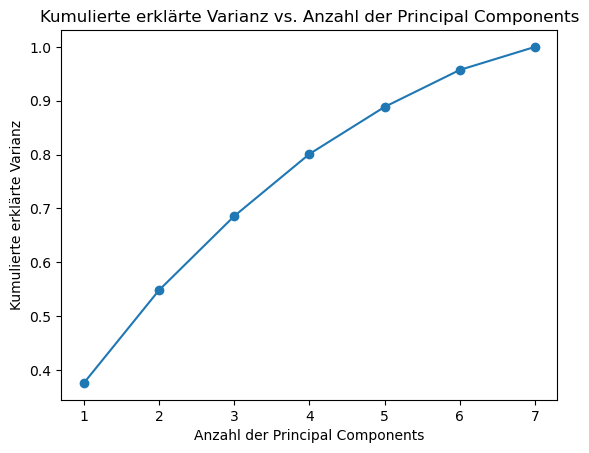

In [46]:
# Visualisierung der kumulierten erklärten Varianz
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Anzahl der Principal Components')
plt.ylabel('Kumulierte erklärte Varianz')
plt.title('Kumulierte erklärte Varianz vs. Anzahl der Principal Components')
plt.show()

In [47]:
# Ausgabe der Komponenten und der Features 
principal_components.shape

(991289, 7)

# Auswahl der Features


In [48]:
# Standardscaler verwenden 
data_subset = StandardScaler().fit_transform(data)

# Hauptkomponentenanalyse mit 90% Varianzerklärung (Erfahrungswert)
pca = PCA(n_components=0.9)

data_pca = pca.fit_transform(data)

# Daten ausgeben 
data_pca

# Umwandeln in Dataframe 


array([[-38.08500084, -10.47750029],
       [-12.20693782,   7.36068247],
       [-20.79879981, -35.60527012],
       ...,
       [ 18.37048446,  24.05426227],
       [-80.7541132 ,   5.58043675],
       [ 31.14458655,   6.95129367]])

In [49]:
# Erkentniss: Reduktion auf zwei Features bei Erklärbarkeit von 90% der Gesamtvarianz 
# Weiteres Vorgehen/Überlegung: verscheidene Zusammensetzung der Inputkomponenten, als auch höhere Varanzerklärung 

In [50]:
data_pca.shape

(991289, 2)

Setzen Sie ggf. die Parameter des Algorithmus zur Dimensionsreduktion mit Hilfe einer Pipeline.

In [51]:
# Neu laden des Datensatzes 

# Neuer Datensatz
path = str(os.getcwd()).replace("\Projektarbeit\Aufgaben", "")

# Lesen der CSV Datei:
dataset = pd.read_csv(path + '\dataset_custom.csv')

In [52]:
# Laden der Test und Trainingsdaten in dieses Notebook (aus Projektarbeit A_6):

def create_raucher_ziel(row):
    if row['Raucher_nie'] == 1:
        return 1
    elif row['Raucher_ehem'] == 1:
        return 2
    elif row['Raucher_aktiv'] == 1:
        return 3
    else:
        return None  # Oder einen Standardwert, je nach Anforderungen

# Neue Zielspalte erstellen:

dataset['Raucher_Ziel'] = dataset.apply(create_raucher_ziel, axis=1)

dataset = dataset.drop(columns=['Raucher_nie', 'Raucher_ehem', 'Raucher_aktiv'])



In [53]:
# Vergabe neuer Variable für den ausgewählten Datensatz/spezifische Parameter 

# Auswahl bestimmer Parameter für die Test und Trainingsdaten 
data = dataset[['Geschlecht', 'Alter', 'Gewicht',
       'HDL_Cholesterin', 'Triglycerid',
       'gamma_GTP', 'Hämoglobin','Raucher_Ziel',]]

X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['Raucher_Ziel']), data['Raucher_Ziel'], test_size=0.2, random_state=42)

In [55]:
# Schritte in der Pipeline
steps = [
    ('scaler', StandardScaler()),         # Vorverarbeitung: Skalierung der Daten
    ('dimension_reduction', PCA(n_components=0.99)),  # 0,99 Verwenden um Gesamtvarianz zu erklären 
    ('classifier', LogisticRegression(multi_class='multinomial', solver='saga', max_iter=2000))  # Softmax Regression
]

# Erstellung der Pipeline
pipeline = Pipeline(steps)

# Training der Pipeline
pipeline.fit(X_train, y_train)

# Bewertung der Pipeline
accuracy = pipeline.score(X_test, y_test)

print(f"Genauigkeit der Pipeline: {accuracy}")

Genauigkeit der Pipeline: 0.6732792623752888


Beschreiben Sie Ihre Ergebnisse. Haben Sie Ihr(e) Ziel(e) erreicht?